In [2]:
import pandas as pd

# Cargar datos desde un archivo CSV
data = pd.read_csv('Restaurant Scrapped.csv')

# Dividir la columna 'Metadata' para extraer el número de reseñas y seguidores
data[['Reviews', 'Followers']] = data['Metadata'].str.split(', ', expand=True)

# Mostrar el resultado
print(data[['Reviews', 'Followers']].head())


      Reviews    Followers
0   1 Review   2 Followers
1  3 Reviews   2 Followers
2  2 Reviews   3 Followers
3   1 Review    1 Follower
4  3 Reviews   2 Followers


In [15]:
import pandas as pd

# Cargar datos desde un archivo CSV
data = pd.read_csv('Restaurant Scrapped.csv')

# Dividir la columna 'Metadata' para extraer el número de reseñas y seguidores
metadata_split = data['Metadata'].str.split(', ', expand=True)

# Extraer los valores numéricos y asignar 0 si no hay un valor presente
data['Reviews'] = metadata_split[0].str.extract('(\d+)', expand=False).fillna(0).astype(int)
data['Followers'] = metadata_split[1].str.extract('(\d+)', expand=False).fillna(0).astype(int)

# Mostrar el resultado
print(data[['Reviews', 'Followers']].head())


   Reviews  Followers
0        1          2
1        3          2
2        2          3
3        1          1
4        3          2


In [21]:
import pandas as pd

# Cargar datos desde un archivo CSV
data = pd.read_csv('Restaurant Scrapped.csv')

# Imprimir toda la columna 'Metadata'
print(data['Metadata'])


0             1 Review , 2 Followers
1            3 Reviews , 2 Followers
2            2 Reviews , 3 Followers
3              1 Review , 1 Follower
4            3 Reviews , 2 Followers
                    ...             
9950       53 Reviews , 54 Followers
9951        2 Reviews , 53 Followers
9952      65 Reviews , 423 Followers
9953      13 Reviews , 144 Followers
9954    472 Reviews , 1302 Followers
Name: Metadata, Length: 9955, dtype: object


<Figure size 1200x600 with 0 Axes>

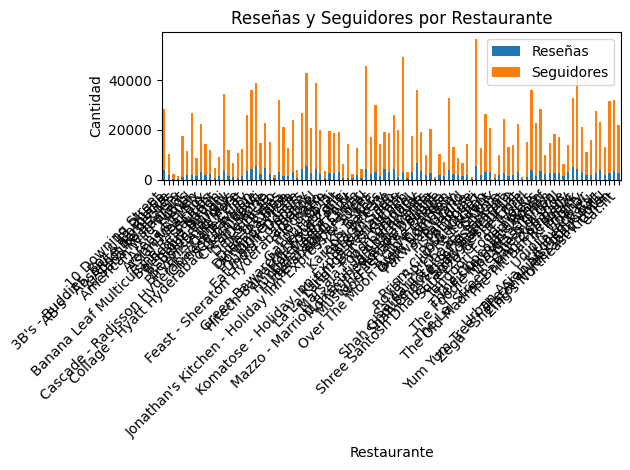

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos desde un archivo CSV
data = pd.read_csv('Restaurant Scrapped.csv')

# Dividir la columna 'Metadata' en dos columnas separadas para reseñas y seguidores
data[['Reviews', 'Followers']] = data['Metadata'].str.extract(r'(\d+) Reviews? , (\d+) Followers?', expand=True)

# Convertir las columnas 'Reviews' y 'Followers' a enteros
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce').fillna(0).astype(int)
data['Followers'] = pd.to_numeric(data['Followers'], errors='coerce').fillna(0).astype(int)

# Agrupar los datos por restaurante y calcular la suma de reseñas y seguidores
grouped_data = data.groupby('Restaurant')[['Reviews', 'Followers']].sum()

# Generar el gráfico
plt.figure(figsize=(12, 6))
grouped_data.plot(kind='bar', stacked=True)
plt.title('Reseñas y Seguidores por Restaurante')
plt.xlabel('Restaurante')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.legend(['Reseñas', 'Seguidores'])
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

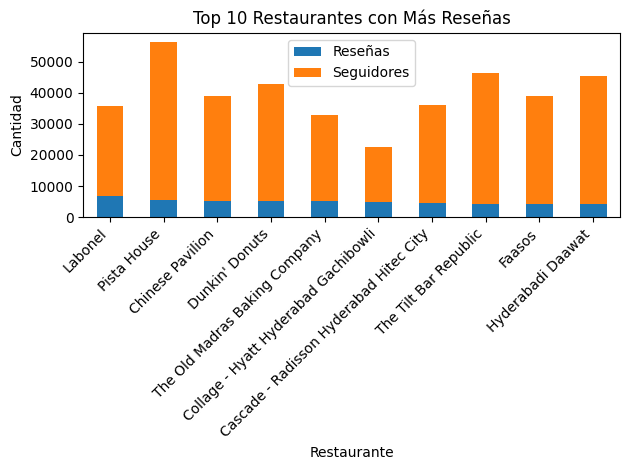

<Figure size 1200x600 with 0 Axes>

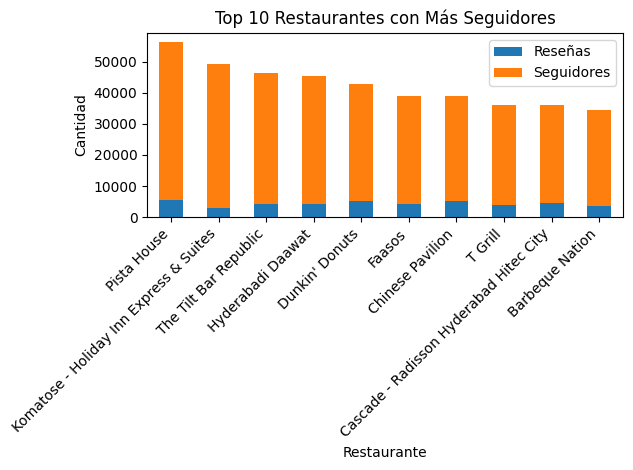

<Figure size 1200x600 with 0 Axes>

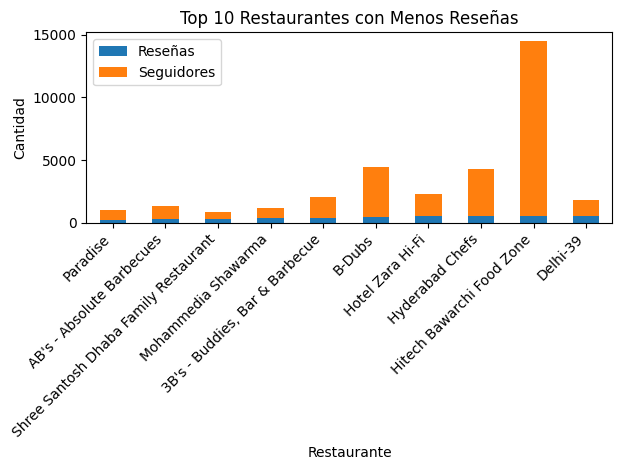

<Figure size 1200x600 with 0 Axes>

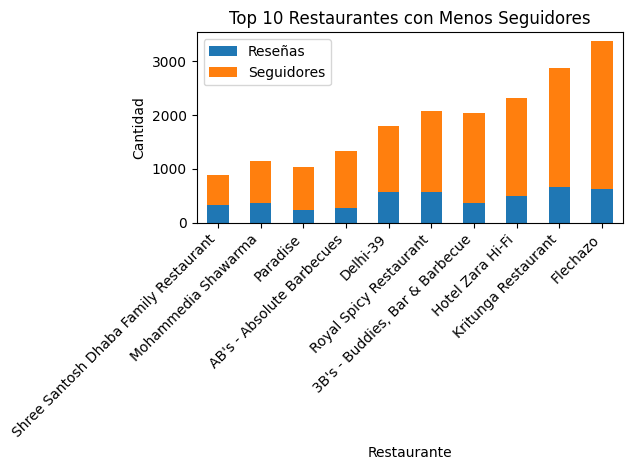

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Restaurant Scrapped.csv')

# Dividir la columna 'Metadata' en dos columnas separadas para reseñas y seguidores
data[['Reviews', 'Followers']] = data['Metadata'].str.extract(r'(\d+) Reviews? , (\d+) Followers?', expand=True)

# Convertir las columnas 'Reviews' y 'Followers' a enteros
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce').fillna(0).astype(int)
data['Followers'] = pd.to_numeric(data['Followers'], errors='coerce').fillna(0).astype(int)

# Agrupar los datos por restaurante y calcular la suma de reseñas y seguidores
grouped_data = data.groupby('Restaurant')[['Reviews', 'Followers']].sum()

# 10 restaurantes con más reseñas y seguidores
top_10_reviews = grouped_data.nlargest(10, 'Reviews')
top_10_followers = grouped_data.nlargest(10, 'Followers')

# 10 restaurantes con menos reseñas y seguidores
bottom_10_reviews = grouped_data.nsmallest(10, 'Reviews')
bottom_10_followers = grouped_data.nsmallest(10, 'Followers')

# Generamos imagen con los 10 restaurantes con más reseñas y seguidores
plt.figure(figsize=(12, 6))
top_10_reviews.plot(kind='bar', stacked=True)
plt.title('Top 10 Restaurantes con Más Reseñas')
plt.xlabel('Restaurante')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.legend(['Reseñas', 'Seguidores'])
plt.tight_layout()
plt.savefig('top_10_reviews.png')
plt.show()

plt.figure(figsize=(12, 6))
top_10_followers.plot(kind='bar', stacked=True)
plt.title('Top 10 Restaurantes con Más Seguidores')
plt.xlabel('Restaurante')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.legend(['Reseñas', 'Seguidores'])
plt.tight_layout()
plt.savefig('top_10_followers.png')
plt.show()

# Generamos imagen con los 10 restaurantes con menos reseñas y seguidores
plt.figure(figsize=(12, 6))
bottom_10_reviews.plot(kind='bar', stacked=True)
plt.title('Top 10 Restaurantes con Menos Reseñas')
plt.xlabel('Restaurante')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.legend(['Reseñas', 'Seguidores'])
plt.tight_layout()
plt.savefig('bottom_10_reviews.png')
plt.show()

plt.figure(figsize=(12, 6))
bottom_10_followers.plot(kind='bar', stacked=True)
plt.title('Top 10 Restaurantes con Menos Seguidores')
plt.xlabel('Restaurante')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.legend(['Reseñas', 'Seguidores'])
plt.tight_layout()
plt.savefig('bottom_10_followers.png')
plt.show()
